# Preferential Attachment from Epistemic Space


Importing required libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output

Define parameters of the model

In [2]:
number_of_authors=100
initial_connections=10
time_steps=100
attempt_per_time_step=10



Function to initialize the epistemic space with random values

In [3]:
def initialize_epistemic_space(number_of_authors):
    """
    Initializes the 2D Epistemic Space with random values
 
    Args:
        number_of_authors (int): Number of authors in the epistemic space
 
    Returns:
        float: 2D array with values between 0 and 1
    """
    epistemic_space=[]
    for i in range(number_of_authors):
        epistemic_space.append([np.random.random(),np.random.random()])
        
    return(epistemic_space)




Function to initialize the epistemic space with uniform values on a grid

In [4]:
def initialize_agents_grid(number_of_authors):
    """
    Initializes the 2D Epistemic Space with uniform values on a grid
 
    Args:
        number_of_authors (int): Number of authors in the epistemic space
 
    Returns:
        float: 2D array with values between 0 and 1
    """
    epistemic_space=[]
    for i in range(10):
        for j in range(10):
            
            epistemic_space.append([(i+0.05)/10,(j+0.05)/10])
        
    return(epistemic_space) 

Function to initialize the network with initial edges

In [5]:
def initialize_network(number_of_authors,initial_connections):
    """
    Initialize a network with given initial connections
 
    Args:
        number_of_authors (int): Number of nodes of the graph
        initial_connections (int): Initial number of edges in the graph
 
    Returns:
        Graph: with number of nodes and initial edges
    """
    G = nx.erdos_renyi_graph(number_of_authors,0)
    nodes = list(G.nodes())
    for i in range(initial_connections):
        node1,node2=np.random.choice(nodes,size=2)
        G.add_edge(node1,node2)
    return(G)



Function to return degree of each node of a network

In [6]:
def list_degrees(G):
    """
    Returns the degrees of each node of a graph
 
    Args:
        G (Graph): Network of authors
 
    Returns:
        int: 1D array with elements as degree of each node
    """
    nodes=list(G.nodes())
    return(np.array([G.degree(node) for node in nodes]))

Function that executes the W model(where we choose nodes which minimize the epistemic distance)
We choose 1 node at random and then find a node among 10 randomly chosen nodes that has the minimum epistemic distance from the chosen node

In [7]:

def W_model(epistemic_space,G):
    """
    Returns 2 nodes of a graph based on W model
 
    Args:
        epistemic space (float): Number of nodes of the graph
        G (graph): Network of authors
 
    Returns:
        int: 2 nodes of the given graph G
    """
    
    nodes = list(G.nodes())
    node1=np.random.choice(nodes,size=1)
    nodes.remove(node1)
    nodes2=np.random.choice(nodes,size=10) 
    distances=[]
    point1=np.array([epistemic_space[node1[0]][0],epistemic_space[node1[0]][1]])
    for j in range(len(nodes2)):
        

        
        point2=np.array([epistemic_space[j][0],epistemic_space[j][1] ])
        dist = np.linalg.norm(point1 - point2)
        distances.append(dist)
        
    return(node1[0],nodes2[np.where(distances==min(distances))[0][0]]) 

Function that executes the P model(where we choose nodes which maximizes mean prestige) We choose 1 node at random with $probabilty(node) = \frac{degree(node)}{Sum(degrees)}$ 
Then find a node among 10 randomly chosen nodes that has the highest degree

In [8]:

def P_model(G):
    """
    Returns 2 nodes of a graph based on P model
 
    Args:
        G (graph): Network of authors
 
    Returns:
        int: 2 nodes of the given graph G
    """
    nodes = list(G.nodes())
    degrees = list_degrees(G)
    node1=np.random.choice(nodes)
    nodes.remove(node1)
    nodes2=np.random.choice(nodes,size=10)
    return(node1,nodes2[np.where(degrees[nodes2]==max(degrees[nodes2]))[0][0]])

Function that updates epistemic coverage of each publication

In [9]:
def calculate_epistemic_coverage(epistemic_space,G,node1,node2,epistemic_coverage):
    """
    Returns 2 nodes of a graph based on W model
 
    Args:
        epistemic space (float): Number of nodes of the graph
        G (graph): Network of authors
        node1 (int): 1st node
        node2 (int): 2nd node
        epistemic coverage(float): 2D array with each point representing a publication
    Returns:
        float: 2D array with new added publications
    """
    m1=G.degree(node1)
    m2=G.degree(node2)
    x1=epistemic_space[node1][0]
    x2=epistemic_space[node2][0]
    y1=epistemic_space[node1][1]
    y2=epistemic_space[node2][1]
    
    point1=float((m1*x1 + m2*x2)/(m1+m2))
    point2=float((m1*y1 + m2*y2)/(m1+m2))
    
    epistemic_coverage.append([point1,point2])

Function that calculates the coordinatess of new publication on edge

In [84]:
def calculate_epistemic_coverage_author_pos(epistemic_space,G,node1,node2,epistemic_coverage):
    """
    Returns 2 nodes of a graph based on W model
 
    Args:
        epistemic space (float): Number of nodes of the graph
        G (graph): Network of authors
        node1 (int): 1st node
        node2 (int): 2nd node
        epistemic coverage(float): 2D array with each point representing a publication
    Returns:
        float: 2D array with new added publications
    """
    x1=epistemic_space[node1][0]
    x2=epistemic_space[node2][0]
    y1=epistemic_space[node1][1]
    y2=epistemic_space[node2][1]
    

    
    epistemic_coverage.append([x1,y1])
    epistemic_coverage.append([x2,y2])

Function that calculates the acceptance probability of publication using P model

In [11]:
def acceptance_Prob_Publication(G,node1,node2):
    """
    Returns probability of publication by 2 authors via P model
 
    Args:
        G (graph): Network of authors
        node1 (int): 1st node
        node2 (int): 2nd node
 
    Returns:
        float: probability of publication of given authors
    """
    degrees = list_degrees(G)
    return ((G.degree(node1) + G.degree(node2))/(degrees.sum()))

Function that calculates the acceptance probability of publication using W model

In [12]:
def acceptance_prob_W(epistemic_space,node1,node2):
    """
    Returns probability of publication by 2 authors via W model
 
    Args:
        epistemic space (float): 2D array representing the epistemic space
        node1 (int): 1st node
        node2 (int): 2nd node
 
    Returns:
        float: probability of publication of given authors
    """
    
    point1=np.array([epistemic_space[node1][0],epistemic_space[node1][1]])
    point2=np.array([epistemic_space[node2][0],epistemic_space[node2][1]])
    dist = np.linalg.norm(point1 - point2)
    return(1-(dist/np.sqrt(2)))  

Function that evolves the network by selecting authors by P model

In [13]:


def evolve_network_PP(G,epistemic_space,time_steps,attempt_per_time_step):
    """
    Returns epistemic coverage by evolving network using PP model
 
    Args:
        G (graph): Network of authors
        epistemic space (float): 2D array representing the epistemic space
        time steps (int): Number to time steps for simulation
        attempt per time steps (int): Number of publications per time step
 
    Returns:
        float: 2D array storing values of epistemic coverage
    """
    epistemic_coverage=[]
    for t in range(time_steps):
        b=0
        while(b<10):
            node1,node2 = P_model(G)
            if(G.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_Prob_Publication(G,node1,node2) :
                    G.add_edge(node1,node2)
                    calculate_epistemic_coverage(epistemic_space,G,node1,node2,epistemic_coverage)
                    b=b+1
    return(epistemic_coverage)




Function that evolves the network by selecting authors by W model

In [14]:
def evolve_network_WP(G,epistemic_space,time_steps,attempt_per_time_step):
    """
    Returns epistemic coverage by evolving network using WP model
 
    Args:
        G (graph): Network of authors
        epistemic space (float): 2D array representing the epistemic space
        time steps (int): Number to time steps for simulation
        attempt per time steps (int): Number of publications per time step
 
    Returns:
        float:  list storing coordinate tuples of epistemic coverage
    """
    epistemic_coverage=[]
    for t in range(time_steps):
        b=0
        while(b!=10):
            node1,node2 = W_model(epistemic_space,G)
            if(G.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_Prob_Publication(G,node1,node2) :
                    G.add_edge(node1,node2)
                    calculate_epistemic_coverage(epistemic_space,G,node1,node2,epistemic_coverage)
                    b=b+1
                
    return(epistemic_coverage)

Function that evolves the network by selecting authors and publication by W model

In [15]:
def evolve_network_WW(G,epistemic_space,time_steps,attempt_per_time_step):
    """
    Returns epistemic coverage by evolving network using WW model
 
    Args:
        G (graph): Network of authors
        epistemic space (float): 2D array representing the epistemic space
        time steps (int): Number to time steps for simulation
        attempt per time steps (int): Number of publications per time step
 
    Returns:
        float: 2D array storing values of epistemic coverage
    """
    epistemic_coverage=[]
    for t in range(time_steps):
        b=0
        while(b!=10):
            node1,node2 = W_model(epistemic_space,G)
            if(G.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_prob_W(epistemic_space,node1,node2) :
                    G.add_edge(node1,node2)
                    calculate_epistemic_coverage(epistemic_space,G,node1,node2,epistemic_coverage)
                    b=b+1
                
    return(epistemic_coverage)

Function that evolves the network by choosing authors by P model and publication by W model

In [16]:
def evolve_network_PW(G,epistemic_space,time_steps,attempt_per_time_step):
    """
    Returns epistemic coverage by evolving network using PW model
 
    Args:
        G (graph): Network of authors
        epistemic space (float): 2D array representing the epistemic space
        time steps (int): Number to time steps for simulation
        attempt per time steps (int): Number of publications per time step
 
    Returns:
        float: 2D array storing values of epistemic coverage
    """
    epistemic_coverage=[]
    for t in range(time_steps):
        b=0
        while(b!=10):
            node1,node2 = P_model(G)
            if(G.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_prob_W(epistemic_space,node1,node2) :
                    G.add_edge(node1,node2)
                    calculate_epistemic_coverage(epistemic_space,G,node1,node2,epistemic_coverage)
                    b=b+1
                
    return(epistemic_coverage)

Function to draw network sturcture of given graph

In [17]:
def draw_graph(G):
    """
    Draws graph as network 
 
    Args:
        G (graph): Network of authors
 
    Returns:
        graph: network of authors
    """
    fig, ax = plt.subplots()
    pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, node_size=50, font_size=8)
    plt.show()


Function to plot degree distribution

In [18]:
def plot_degree_distribution(G):
    """
    Plots the degree distribution of any given graph 
 
    Args:
        G (graph): Network of authors
 
    Returns:
        float: 1D array of size equal to number of nodes of network
    """
    degrees = dict(G.degree())

    # Calculate the degree distribution
    degree_distribution = [list(degrees.values()).count(i) for i in range(max(degrees.values()) + 1)]

    # Normalize the degree distribution to obtain probabilities
    total_nodes = len(G.nodes())
    degree_distribution_prob = [count / total_nodes for count in degree_distribution]

    # Plot the degree distribution
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(degree_distribution_prob)), degree_distribution_prob, width=0.8, color='b', alpha=0.7)
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('Degree Distribution of the Network')
    plt.xticks(range(len(degree_distribution_prob)))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
        

Function to plot the number of authorships for each author in ascending order

In [19]:
def plot_sorted_degree_distribution(G):
    """
    Plots the sorted degree distribution of any given graph 
 
    Args:
        G (graph): Network of authors
 
    Returns:
        float: 1D array of size equal to number of nodes of network
    """
    plt.figure(figsize=(10, 6))
    plt.plot(np.sort(list_degrees(G)))
    plt.xlabel('Authors')
    plt.ylabel('Degree')
    plt.title('Degree Distribution with sorted authorships')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    


Function to plot heat map of epsitemic coverage of published papers

In [20]:

def plot_epistemic_coverage(epistemic_coverage):
    """
    Plots the epistemic coverage 
 
    Args:
        epistemic coverage (float): contains the position of each publication in epistemic space
 
    Returns:
        float: 2D array of size equal to number of authors
    """
    ec=epistemic_coverage
    x=np.zeros(len(ec))
    y=np.zeros(len(ec))

    for i in range(len(ec)):
        x[i]=ec[i][1]
        y[i]=ec[i][0]
        
    fig, ax = plt.subplots()
    h = ax.hist2d(x, y)
    fig.colorbar(h[3], ax=ax)



Function to show the time evolution of network simulation

In [21]:
def run_network_simulation(G,epistemic_space,time_steps,attempt_per_time_step):
    """
    Shows the time evolution of citation network using WP model
 
    Args:
        G (graph): Network of authors
        epistemic space (float): 2D array representing the epistemic space
        time steps (int): Number to time steps for simulation
        attempt per time steps (int): Number of publications per time step
 
    Returns:
        graph: network with nodes equal to number of authors 
    """

    fig, ax = plt.subplots()
    pos = nx.spring_layout(G)
    for frame in range(time_steps):
        evolve_network_WP(G,epistemic_space, 1, attempt_per_time_step)

       
        clear_output(wait=True)
        nx.draw(G, pos=pos, with_labels=True, node_size=50, font_size=8)
        plt.title(f'Time Step: {frame}')
        plt.show()


Function to display the graph in Epistemic Space

In [22]:
def draw_network_in_epistemic_space(G,epistemic_space):
    """
    Shows the network in epistemic space
 
    Args:
        G (graph): Network of authors
        epistemic space (float): 2D array representing the epistemic space
        
    Returns:
        graph: network with nodes equal to number of authors 
    """
    coordinates =epistemic_space
    pos = {i: (coordinates[i][0], coordinates[i][1]) for i in range(len(coordinates))}
    plt.figure(figsize=(8, 8))
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)


    nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=16, font_color='black', font_weight='bold', edge_color='gray')
    plt.title('Authors in Epistemic Space')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.show()

## WP Model

Collaboration depends upon Epistemic interests and publication on mean prestige

Initializing the network

In [169]:
G=initialize_network(number_of_authors,initial_connections)

0

In [170]:
list_degrees(G)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

Initializing epsitemic space

In [171]:
epistemic_space=initialize_epistemic_space(number_of_authors)


Evolving the network using WP model to calculate epistemic coverage

In [172]:

epistemic_coverage=evolve_network_WP(G,epistemic_space,time_steps,attempt_per_time_step)
G.number_of_edges()

1010

In [182]:
ec=epistemic_coverage
x=np.zeros(len(ec))
y=np.zeros(len(ec))

for i in range(len(ec)):
    x[i]=ec[i][1]
    y[i]=ec[i][0]
c1,x,y=np.histogram2d(x,y)
print(c1)
cou =[]
for x in range (0, 10):
    for y in range (0, 10):
        c = c1[x][y]
        cou.append(c)
print (cou)


[[ 0.  0.  4.  2.  6. 10.  1.  0.  4.  0.]
 [ 0.  2.  5.  9.  7. 12. 15.  4.  0.  1.]
 [ 1.  4.  7. 10. 15. 16. 13. 16.  2.  0.]
 [ 1.  5. 10. 25. 16. 18. 25. 30. 26.  0.]
 [ 4.  7.  6. 21. 22. 23. 26. 21. 23.  6.]
 [ 5.  6. 12. 15. 20. 14. 18. 11. 23.  7.]
 [ 1.  5.  6. 13. 17. 15. 25. 19.  8.  7.]
 [ 2.  5. 14. 13. 24.  5. 15. 12. 12. 14.]
 [ 2.  1. 12. 20. 30.  6. 12.  9.  9. 10.]
 [ 0.  4.  8. 14. 11.  3.  2.  2.  1.  0.]]
[0.0, 0.0, 4.0, 2.0, 6.0, 10.0, 1.0, 0.0, 4.0, 0.0, 0.0, 2.0, 5.0, 9.0, 7.0, 12.0, 15.0, 4.0, 0.0, 1.0, 1.0, 4.0, 7.0, 10.0, 15.0, 16.0, 13.0, 16.0, 2.0, 0.0, 1.0, 5.0, 10.0, 25.0, 16.0, 18.0, 25.0, 30.0, 26.0, 0.0, 4.0, 7.0, 6.0, 21.0, 22.0, 23.0, 26.0, 21.0, 23.0, 6.0, 5.0, 6.0, 12.0, 15.0, 20.0, 14.0, 18.0, 11.0, 23.0, 7.0, 1.0, 5.0, 6.0, 13.0, 17.0, 15.0, 25.0, 19.0, 8.0, 7.0, 2.0, 5.0, 14.0, 13.0, 24.0, 5.0, 15.0, 12.0, 12.0, 14.0, 2.0, 1.0, 12.0, 20.0, 30.0, 6.0, 12.0, 9.0, 9.0, 10.0, 0.0, 4.0, 8.0, 14.0, 11.0, 3.0, 2.0, 2.0, 1.0, 0.0]


In [190]:
x=0.08
y=0.23
q=100*x
p=100*x
print(int((q-q%10)/10))

0


Drawing the resulting graph

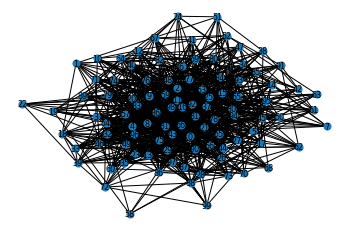

In [27]:
draw_graph(G)

Ploting epsitemic coverage

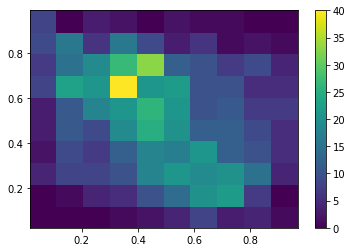

In [28]:
plot_epistemic_coverage(epistemic_coverage)

Plotting degree distribution

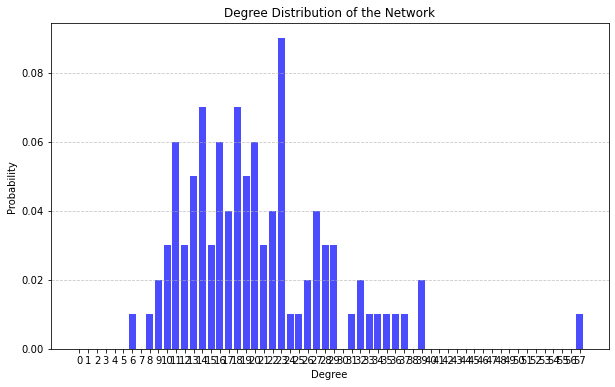

In [29]:
plot_degree_distribution(G)

## PP Model 

Collaboration and publication both depend upon mean prestige

In [30]:
G=initialize_network(number_of_authors,10)


In [31]:
epistemic_coverage=evolve_network_PP(G,epistemic_space,100,attempt_per_time_step)
print(G.number_of_edges())

1010


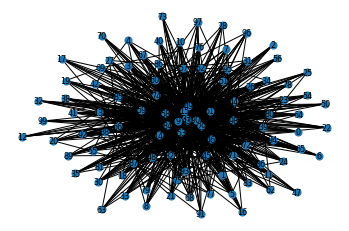

1010


In [32]:
draw_graph(G)
print(G.number_of_edges())

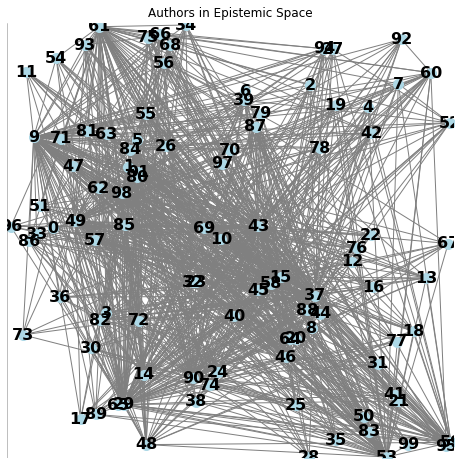

In [33]:
draw_network_in_epistemic_space(G,epistemic_space)



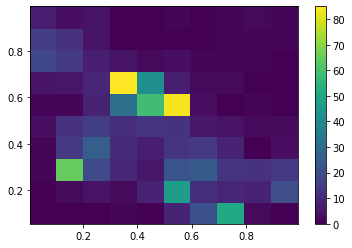

In [34]:
plot_epistemic_coverage(epistemic_coverage)

In [35]:
print(sum(list_degrees(G)),G.number_of_edges())


2020 1010


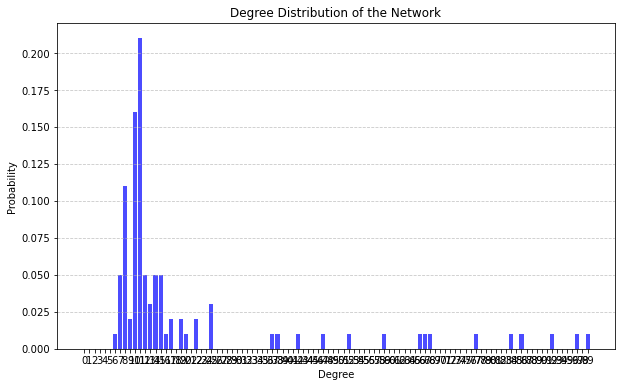

In [36]:
plot_degree_distribution(G)

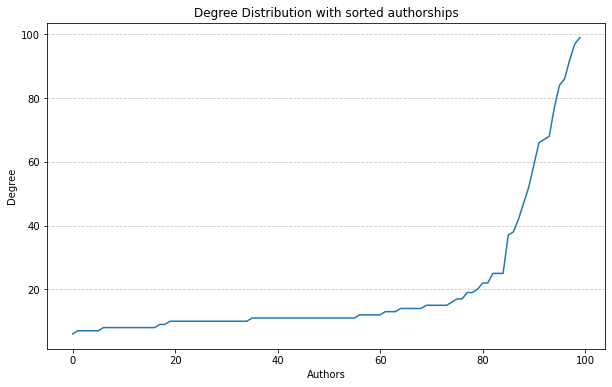

In [37]:
plot_sorted_degree_distribution(G)

In [38]:
#run_network_simulation(G,epistemic_space,time_steps,attempt_per_time_step)

## Combined Results

Function to show Degree Distribution for PP,PW,WP,WW models side by side

In [39]:
def degree_distribution_combined(G1,G2,G3,G4):
    """
    Shows the sorted degree distribution for 4 given graphs
 
    Args:
        G1 (graph): Network of authors
        G2 (graph): Network of authors
        G3 (graph): Network of authors
        G4 (graph): Network of authors
                
    Returns:
        float: 1D array of size equal to number of authors
    """
    
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,5))

    ax1.plot(np.sort(list_degrees(G1)))

    ax1.set_title('WP')
    ax1.set_xlabel('Authors')
    ax1.set_ylabel('# Authorships')
    ax1.grid(True)

    ax2.plot(np.sort(list_degrees(G2)))
    ax2.set_title('PP')
    ax2.set_xlabel('Authors')
    ax2.set_ylabel('# Authorships')
    ax2.grid(True)
    
    ax3.plot(np.sort(list_degrees(G3)))
    ax3.set_title('PW')
    ax3.set_xlabel('Authors')
    ax3.set_ylabel('# Authorships')
    ax3.grid(True)
    
    ax4.plot(np.sort(list_degrees(G4)))
    ax4.set_title('WW')
    ax4.set_xlabel('Authors')
    ax4.set_ylabel('# Authorships')
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()    

Function to show heatmap of Epistemic Coverage for PP and WP models side by side

In [80]:
def heatmap_combined(ec1,ec2,ec3,ec4):
    """
    Plots the heat map of epsitemic coverages for 4 given graphs
 
    Args:
        ec1 (float): epistemic coverage for a given graph
        ec2 (float): epistemic coverage for a given graph
        ec3 (float): epistemic coverage for a given graph
        ec4 (float): epistemic coverage for a given graph
                
    Returns:
        float: 2D array of size equal to number of authors
    """

    
    x1=np.zeros(len(ec1))
    y1=np.zeros(len(ec1))
    x2=np.zeros(len(ec2))
    y2=np.zeros(len(ec2))
    x3=np.zeros(len(ec3))
    y3=np.zeros(len(ec3))
    x4=np.zeros(len(ec4))
    y4=np.zeros(len(ec4))

    for i in range(len(ec1)):
        x1[i]=ec1[i][0]
        y1[i]=ec1[i][1]

    for i in range(len(ec2)):
        x2[i]=ec2[i][0]
        y2[i]=ec2[i][1]
        
    for i in range(len(ec3)):
        x3[i]=ec3[i][0]
        y3[i]=ec3[i][1]

    for i in range(len(ec4)):
        x4[i]=ec4[i][0]
        y4[i]=ec4[i][1]

    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,5))

    
    h = ax1.hist2d(x1, y1)
    fig.colorbar(h[3], ax=ax1)
    ax1.set_title('WP')
    ax1.grid(True)

    h = ax2.hist2d(x2, y2)
    fig.colorbar(h[3], ax=ax2)
    ax2.set_title('PP')
    ax2.grid(True)
    
    h = ax3.hist2d(x3, y3)
    fig.colorbar(h[3], ax=ax3)
    ax3.set_title('PW')
    ax3.grid(True)
    
    h = ax4.hist2d(x4, y4)
    fig.colorbar(h[3], ax=ax4)
    ax4.set_title('WW')
    ax4.grid(True)

Function to show Network on heatmap for all the models side by side

In [126]:
def network_on_heatmap(G1,G2,G3,G4,ec1,ec2,ec3,ec4,epistemic_space):
    """
    Plots the heat map of epsitemic coverages for 4 given graphs in epistemic space
 
    Args:
        G1 (graph): network of authors
        G2 (graph): network of authors
        G3 (graph): network of authors
        G4 (graph): network of authors
        ec1 (float): epistemic coverage for a given graph
        ec2 (float): epistemic coverage for a given graph
        ec3 (float): epistemic coverage for a given graph
        ec4 (float): epistemic coverage for a given graph
        
                
    Returns:
        float: 2D array of size equal to number of authors
    """

    x1=np.zeros(len(ec1))
    y1=np.zeros(len(ec1))
    for i in range(len(ec1)):
        x1[i]=ec1[i][0]
        y1[i]=ec1[i][1]
    coordinates=epistemic_space
    pos1 = {i: (coordinates[i][0], coordinates[i][1]) for i in range(len(coordinates))}
    
    
    x2=np.zeros(len(ec2))
    y2=np.zeros(len(ec2))
    for i in range(len(ec2)):
        x2[i]=ec2[i][0]
        y2[i]=ec2[i][1]
   
    pos2 = {i: (coordinates[i][0], coordinates[i][1]) for i in range(len(coordinates))}
    
    x3=np.zeros(len(ec3))
    y3=np.zeros(len(ec3))
    for i in range(len(ec3)):
        x3[i]=ec3[i][0]
        y3[i]=ec3[i][1]
    
    pos3 = {i: (coordinates[i][0], coordinates[i][1]) for i in range(len(coordinates))}
    
    x4=np.zeros(len(ec4))
    y4=np.zeros(len(ec4))
    for i in range(len(ec4)):
        x4[i]=ec4[i][0]
        y4[i]=ec4[i][1]
   
    pos4 = {i: (coordinates[i][0], coordinates[i][1]) for i in range(len(coordinates))}






    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 5))

    h = ax1.hist2d(x1, y1)
    fig.colorbar(h[3], ax=ax1)
    nx.draw(G1, pos=pos1,ax=ax1,alpha=0.4, node_size=10, node_color='red', edge_color='gray')
    ax1.set_title('WP')
    ax1.grid(True)

    h = ax2.hist2d(x2, y2)
    fig.colorbar(h[3], ax=ax2)
    nx.draw(G2,pos= pos2,ax=ax2,alpha=0.4, node_size=10, node_color='lightblue', edge_color='gray')
    ax2.set_title('PP')
    ax2.grid(True)
    
    h = ax3.hist2d(x3, y3)
    fig.colorbar(h[3], ax=ax3)
    nx.draw(G3,pos= pos3,ax=ax3,alpha=0.4, node_size=10, node_color='lightblue', edge_color='gray')
    ax3.set_title('PW')
    ax3.grid(True)
    
    h = ax4.hist2d(x4, y4)
    fig.colorbar(h[3], ax=ax4)
    nx.draw(G4,pos= pos4,ax=ax4,alpha=0.4, node_size=10, node_color='lightblue', edge_color='gray')
    ax4.set_title('WW')
    ax4.grid(True)


Function to plot the network in the coordinates of epistemic space

In [117]:
def network_on_epistemic_space(G1,G2,G3,G4,epistemic_space,ec1,ec2,ec3,ec4):
    """
    Plots the heat map of epsitemic coverages for 4 given graphs in epistemic space
 
    Args:
        G1 (graph): network of authors
        G2 (graph): network of authors
        G3 (graph): network of authors
        G4 (graph): network of authors
        epistemic space (float): epistemic space for a given graph
       
        
                
    Returns:
        float: 2D array of size equal to number of authors
    """

    x_auth=np.zeros(len(epistemic_space))
    y_auth=np.zeros(len(epistemic_space))
    for i in range(len(epistemic_space)):
        x_auth[i]=epistemic_space[i][0]
        y_auth[i]=epistemic_space[i][1]
    coordinates =epistemic_space
    pos_auth = {i: (coordinates[i][0], coordinates[i][1]) for i in range(len(coordinates))}
    



    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 5))

    h = ax1.hist2d(x_auth, y_auth)
    fig.colorbar(h[3], ax=ax1)
    nx.draw(G1, pos=pos_auth,ax=ax1,alpha=0.4, node_size=10, node_color='red', edge_color='white')
    ax1.set_title('WP')
    ax1.grid(True)

    h = ax2.hist2d(x_auth, y_auth)
    fig.colorbar(h[3], ax=ax2)
    nx.draw(G2,pos=pos_auth,ax=ax2,alpha=0.4, node_size=10, node_color='red', edge_color='white')
    ax2.set_title('PP')
    ax2.grid(True)
    
    h = ax3.hist2d(x_auth, y_auth)
    fig.colorbar(h[3], ax=ax3)
    nx.draw(G3,pos= pos_auth,ax=ax3,alpha=0.4, node_size=10, node_color='red', edge_color='white')
    ax3.set_title('PW')
    ax3.grid(True)
    
    h = ax4.hist2d(x_auth, y_auth)
    fig.colorbar(h[3], ax=ax4)
    nx.draw(G4,pos= pos_auth,ax=ax4,alpha=0.4, node_size=10, node_color='red', edge_color='white')
    ax4.set_title('WW')
    ax4.grid(True)


Function to evolve network using publucation at author location

In [144]:
def evolve_network_author_pos(G1,G2,G3,G4,epistemic_space,time_steps,attempt_per_time_step):
    """
    Returns epistemic coverage by evolving network using WP model
 
    Args:
        G (graph): Network of authors
        epistemic space (float): 2D array representing the epistemic space
        time steps (int): Number to time steps for simulation
        attempt per time steps (int): Number of publications per time step
 
    Returns:
        float: 4 arrays storing values of epistemic coverages
    """
    ec1=[]
    for t in range(time_steps):
        b=0
        while(b!=10):
            node1,node2 = W_model(epistemic_space,G1)
            if(G1.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_Prob_Publication(G1,node1,node2) :
                    G1.add_edge(node1,node2)
                    calculate_epistemic_coverage_author_pos(epistemic_space,G1,node1,node2,ec1)
                    b=b+1
                    
    ec2=[]
    for t in range(time_steps):
        b=0
        while(b<10):
            node1,node2 = P_model(G2)
            if(G2.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_Prob_Publication(G2,node1,node2) :
                    G2.add_edge(node1,node2)
                    calculate_epistemic_coverage_author_pos(epistemic_space,G2,node1,node2,ec2)
                    b=b+1
    
    ec3=[]
    for t in range(time_steps):
        b=0
        while(b!=10):
            node1,node2 = P_model(G3)
            if(G3.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_prob_W(epistemic_space,node1,node2) :
                    G3.add_edge(node1,node2)
                    calculate_epistemic_coverage_author_pos(epistemic_space,G3,node1,node2,ec3)
                    b=b+1
                    
    ec4=[]
    for t in range(time_steps):
        b=0
        while(b!=10):
            node1,node2 = W_model(epistemic_space,G4)
            if(G4.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_prob_W(epistemic_space,node1,node2) :
                    G4.add_edge(node1,node2)
                    calculate_epistemic_coverage_author_pos(epistemic_space,G4,node1,node2,ec4)
                    b=b+1
                
    return(ec1,ec2,ec3,ec4)

### Random initialization of epistemic space 

Initializing variables

In [128]:
G1=initialize_network(number_of_authors,10)
G2=initialize_network(number_of_authors,10)
G3=initialize_network(number_of_authors,10)
G4=initialize_network(number_of_authors,10)
epistemic_space=initialize_epistemic_space(number_of_authors) 

Heat map for the Epistemic space

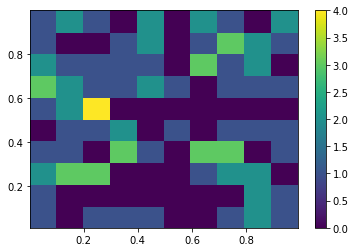

In [129]:
plot_epistemic_coverage(epistemic_space)

Evolving networks using PW,WW,PP and WP models

In [130]:
ec1=evolve_network_WP(G1,epistemic_space,time_steps,attempt_per_time_step)
ec2=evolve_network_PP(G2,epistemic_space,time_steps,attempt_per_time_step)


In [131]:
ec3=evolve_network_PW(G3,epistemic_space,time_steps,attempt_per_time_step)
ec4=evolve_network_WW(G4,epistemic_space,time_steps,attempt_per_time_step)

Degree Distribution

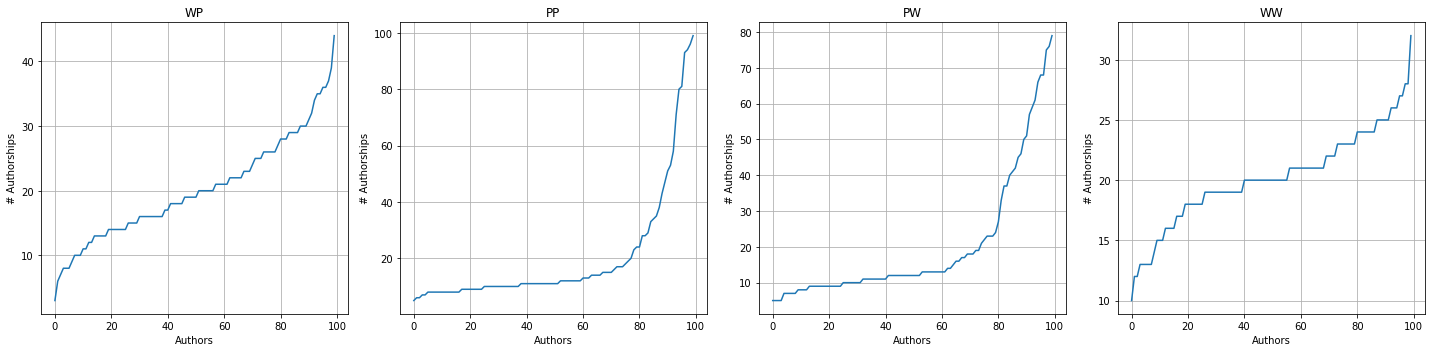

In [132]:
degree_distribution_combined(G1,G2,G3,G4)

Epsitemic coverage heat map

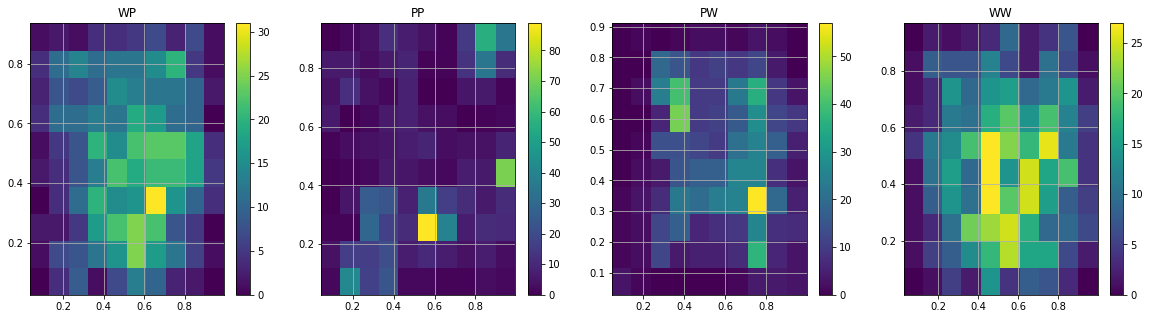

In [133]:
heatmap_combined(ec1,ec2,ec3,ec4)

Network in Epistemic space

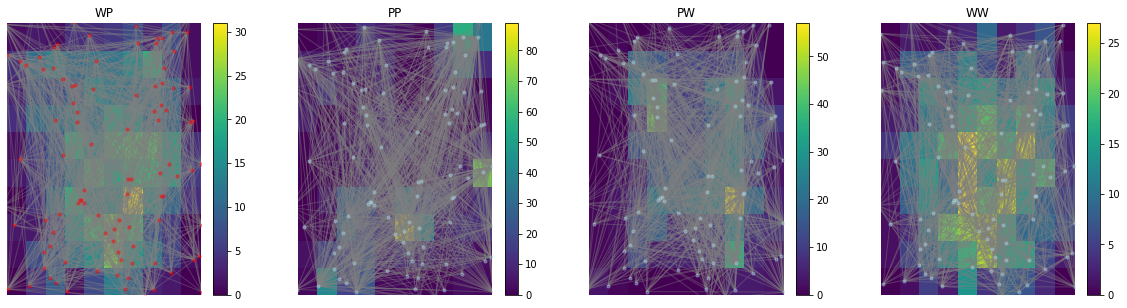

In [134]:
network_on_heatmap(G1,G2,G3,G4,ec1,ec2,ec3,ec4,epistemic_space)


### Uniform initialization of epistemic space

In [135]:
G1=initialize_network(number_of_authors,10)
G2=initialize_network(number_of_authors,10)
G3=initialize_network(number_of_authors,10)
G4=initialize_network(number_of_authors,10)
epistemic_space=initialize_agents_grid(number_of_authors)

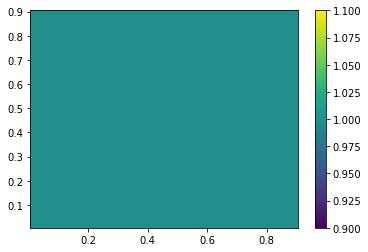

In [136]:
plot_epistemic_coverage(epistemic_space)

In [137]:
ec1=evolve_network_WP(G1,epistemic_space,time_steps,attempt_per_time_step)
ec2=evolve_network_PP(G2,epistemic_space,time_steps,attempt_per_time_step)


In [138]:
ec3=evolve_network_PW(G3,epistemic_space,time_steps,attempt_per_time_step)


In [139]:
ec4=evolve_network_WW(G4,epistemic_space,time_steps,attempt_per_time_step)

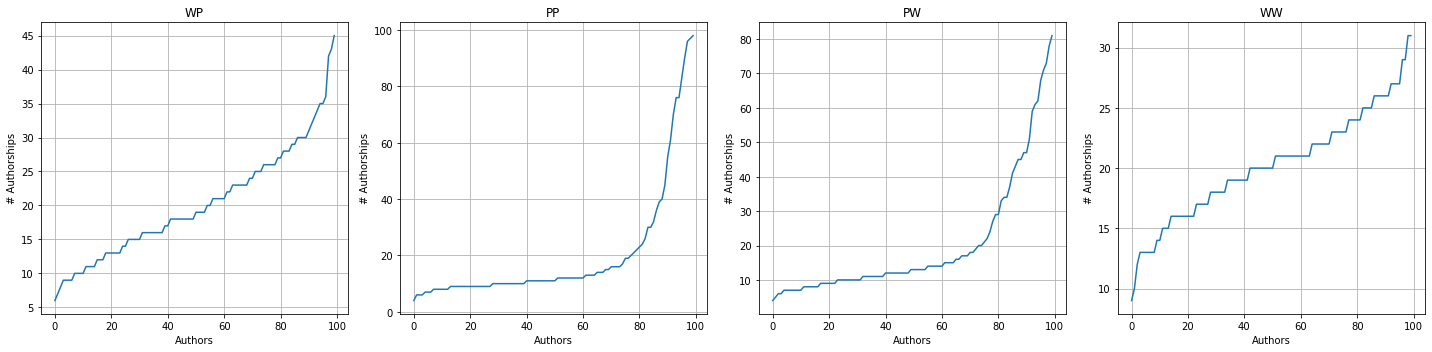

In [140]:
degree_distribution_combined(G1,G2,G3,G4)

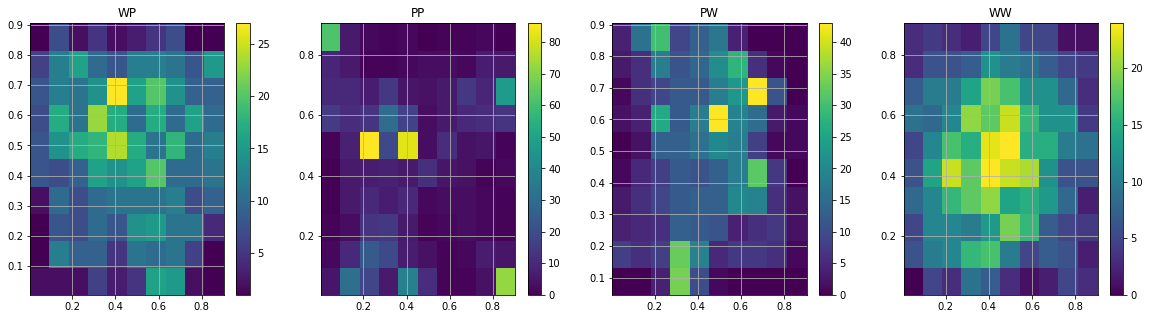

In [141]:
heatmap_combined(ec1,ec2,ec3,ec4)

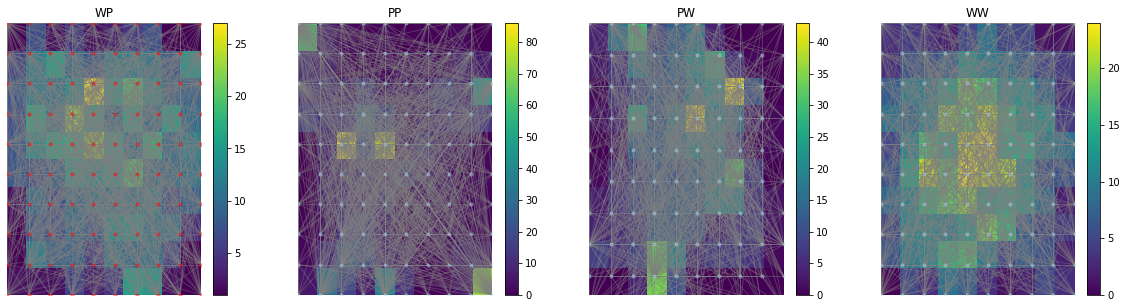

In [142]:
network_on_heatmap(G1,G2,G3,G4,ec1,ec2,ec3,ec4,epistemic_space)

## Introducing N Model

In [235]:
def N_model(epistemic_space,G,epistemic_coverage):
    """
    Returns 2 nodes of a graph based on N model
 
    Args:
        epistemic space (float): Number of nodes of the graph
        G (graph): Network of authors
        epistemic coverage(float): Coordinates of each publication
 
    Returns:
        int: 2 nodes of the given graph G
    """
    
    nodes = list(G.nodes())
    node1=np.random.choice(nodes,size=1)
    m1=G.degree(node1[0])
    x1=epistemic_space[node1[0]][0]
    y1=epistemic_space[node1[0]][1]
    nodes.remove(node1)
    nodes2=np.random.choice(nodes,size=10) 
    
    
   
    x_pub=[]
    y_pub=[]
    for k in range(len(nodes2)):
        m=G.degree(nodes2[k])
        x=epistemic_space[nodes2[k]][0]
        y=epistemic_space[nodes2[k]][1]
        if m1+m ==0:
            
            x_pub.append((m1*x1 + m*x)/(m1+m+0.01))
            y_pub.append((m1*y1 + m*y)/(m1+m+0.01))
            
        else:
            x_pub.append((m1*x1 + m*x)/(m1+m))
            y_pub.append((m1*y1 + m*y)/(m1+m))
            
    
        
    ec=epistemic_coverage
    x=np.zeros(len(ec))
    y=np.zeros(len(ec))

    for i in range(len(ec)):
        x[i]=ec[i][1]
        y[i]=ec[i][0]
    c1,x,y=np.histogram2d(x,y)
    counts=np.zeros(len(nodes2))

    for i in range(len(nodes2)):
        xx=100*x_pub[i]
        yy=100*y_pub[i]
        x_t=int((xx-xx%10)/10)
        y_t=int((yy-yy%10)/10)
        counts[i]=c1[x_t][y_t]  
        
    return(node1[0],nodes2[np.argmin(counts)])

In [313]:
def acceptance_prob_N_model(node1,node2,G,epistemic_space,epistemic_coverage):
    """
    Returns probability of choosing a pair of authors using N model
 
    Args:
        node1 (int):node index of an author
        node2 (int):node index of an author
        epistemic space (float): Number of nodes of the graph
        G (graph): Network of authors
        epistemic coverage(float): Coordinates of each publication
 
    Returns:
        float: probability
    """
    m1=G.degree(node1)
    m2=G.degree(node2)
    x1=epistemic_space[node1][0]
    x2=epistemic_space[node2][0]
    y1=epistemic_space[node1][1]
    y2=epistemic_space[node2][1]
    
    if m1+m2 ==0:
            
        x_pub=((m1*x1 + m2*x2)/(m1+m2+0.01))
        y_pub=((m1*y1 + m2*y2)/(m1+m2+0.01))
            
    else:
        x_pub=((m1*x1 + m2*x2)/(m1+m2))
        y_pub=((m1*y1 + m2*y2)/(m1+m2))
        
        
    ec=epistemic_coverage
    x=np.zeros(len(ec))
    y=np.zeros(len(ec))

    for i in range(len(ec)):
        x[i]=ec[i][1]
        y[i]=ec[i][0]
    c1,x,y=np.histogram2d(x,y)
    count=0

   
    xx=100*x_pub
    yy=100*y_pub
    x_t=int((xx-xx%10)/10)
    y_t=int((yy-yy%10)/10)
    count=c1[x_t][y_t] 
    
    return(np.exp(-1*count))

   


In [314]:
def evolve_network_using_N_model(G1,G2,G3,G4,epistemic_space,time_steps,attempt_per_time_step):
    """
    Evolves the network for all 4 models using N model
 
    Args:
        G1 (graph): Network of authors
        G2 (graph): Network of authors
        G3 (graph): Network of authors
        G4 (graph): Network of authors
        epistemic space (float): Number of nodes of the graph
        time steps (int): Number of time steps for the simulation
        attempt per time step (int): Number of attempts for each time step
        
 
    Returns:
        float: tuples containing epistemic coverages
    """
    ec1=[]
    for t in range(time_steps):
        b=0
        while(b!=10):
            node1,node2 = N_model(epistemic_space,G1,ec1)
            if(G1.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_prob_W(epistemic_space,node1,node2) :
                    G1.add_edge(node1,node2)
                    calculate_epistemic_coverage(epistemic_space,G1,node1,node2,ec1)
                    b=b+1

    ec2=[]
    for t in range(time_steps):
        b=0
        while(b!=10):
            node1,node2 = N_model(epistemic_space,G2,ec2)
            if(G2.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_Prob_Publication(G2,node1,node2) :
                    G2.add_edge(node1,node2)
                    calculate_epistemic_coverage(epistemic_space,G2,node1,node2,ec2)
                    b=b+1
    ec3=[]
    for t in range(time_steps):
        b=0
        while(b!=10):
            node1,node2 = W_model(epistemic_space,G3)
            if(G3.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_prob_N_model(node1,node2,G3,epistemic_space,ec3) :
                    G3.add_edge(node1,node2)
                    calculate_epistemic_coverage(epistemic_space,G3,node1,node2,ec3)
                    b=b+1

    ec4=[]
    for t in range(time_steps):
        b=0
        while(b!=10):
            node1,node2 = P_model(G4)
            if(G4.has_edge(node1,node2)==False):
                if np.random.random() < acceptance_prob_N_model(node1,node2,G4,epistemic_space,ec4) :
                    G4.add_edge(node1,node2)
                    calculate_epistemic_coverage(epistemic_space,G4,node1,node2,ec4)
                    b=b+1
                    
    return(ec1,ec2,ec3,ec4)


In [315]:

    
def plot_figures_NW(G1,ec1,epistemic_space):
    """
    Plots the results for NW model
 
    Args:
        G1 (graph): Network of authors
        ec1 (float): Coordinates of publications
        epistemic space (float): Number of nodes of the graph
        
 
    Returns:None
        
    """
    x1=np.zeros(len(ec1))
    y1=np.zeros(len(ec1))
    
    for i in range(len(ec1)):
        x1[i]=ec1[i][0]
        y1[i]=ec1[i][1]

    coordinates=epistemic_space
    pos1 = {i: (coordinates[i][0], coordinates[i][1]) for i in range(len(coordinates))}
    
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 5))
    
    h = ax1.hist2d(x1, y1)
    fig.colorbar(h[3], ax=ax1)
    ax1.set_title('Epistemic Coverage for NW model')
    ax1.grid(True)
    
    h = ax2.hist2d(x1, y1)
    fig.colorbar(h[3], ax=ax2)
    nx.draw(G1, pos=pos1,ax=ax2,alpha=0.4, node_size=10, node_color='lightblue', edge_color='gray')
    ax2.set_title('Network in Epistemic space for NW model')
    ax2.grid(True)

    
    
    
    ax3.plot(np.sort(list_degrees(G1)))

    ax3.set_title('NW')
    ax3.set_xlabel('Authors')
    ax3.set_ylabel('# Authorships')
    ax3.grid(True)
    

In [316]:

    
def plot_figures_NP(G1,ec1,epistemic_space):
    """
    Plots the results for NP model
 
    Args:
        G1 (graph): Network of authors
        ec1 (float): Coordinates of publications
        epistemic space (float): Number of nodes of the graph
        
 
    Returns:None
        
    """
    x1=np.zeros(len(ec1))
    y1=np.zeros(len(ec1))
    
    for i in range(len(ec1)):
        x1[i]=ec1[i][0]
        y1[i]=ec1[i][1]

    coordinates=epistemic_space
    pos1 = {i: (coordinates[i][0], coordinates[i][1]) for i in range(len(coordinates))}
    
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 5))
    
    h = ax1.hist2d(x1, y1)
    fig.colorbar(h[3], ax=ax1)
    ax1.set_title('Epistemic Coverage for NP model')
    ax1.grid(True)
    
    h = ax2.hist2d(x1, y1)
    fig.colorbar(h[3], ax=ax2)
    nx.draw(G1, pos=pos1,ax=ax2,alpha=0.4, node_size=10, node_color='lightblue', edge_color='gray')
    ax2.set_title('Network in Epistemic space for NP model')
    ax2.grid(True)

    
    
    
    ax3.plot(np.sort(list_degrees(G1)))

    ax3.set_title('NP')
    ax3.set_xlabel('Authors')
    ax3.set_ylabel('# Authorships')
    ax3.grid(True)
    

In [317]:

    
def plot_figures_WN(G1,ec1,epistemic_space):
    """
    Plots the results for WN model
 
    Args:
        G1 (graph): Network of authors
        ec1 (float): Coordinates of publications
        epistemic space (float): Number of nodes of the graph
        
 
    Returns:None
        
    """
    x1=np.zeros(len(ec1))
    y1=np.zeros(len(ec1))
    
    for i in range(len(ec1)):
        x1[i]=ec1[i][0]
        y1[i]=ec1[i][1]

    coordinates=epistemic_space
    pos1 = {i: (coordinates[i][0], coordinates[i][1]) for i in range(len(coordinates))}
    
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 5))
    
    h = ax1.hist2d(x1, y1)
    fig.colorbar(h[3], ax=ax1)
    ax1.set_title('Epistemic Coverage for WN model')
    ax1.grid(True)
    
    h = ax2.hist2d(x1, y1)
    fig.colorbar(h[3], ax=ax2)
    nx.draw(G1, pos=pos1,ax=ax2,alpha=0.4, node_size=10, node_color='lightblue', edge_color='gray')
    ax2.set_title('Network in Epistemic space for WN model')
    ax2.grid(True)

    
    
    
    ax3.plot(np.sort(list_degrees(G1)))

    ax3.set_title('WN')
    ax3.set_xlabel('Authors')
    ax3.set_ylabel('# Authorships')
    ax3.grid(True)
    

In [318]:

    
def plot_figures_PN(G1,ec1,epistemic_space):
    """
    Plots the results for PN model
 
    Args:
        G1 (graph): Network of authors
        ec1 (float): Coordinates of publications
        epistemic space (float): Number of nodes of the graph
        
 
    Returns:None
        
    """
    x1=np.zeros(len(ec1))
    y1=np.zeros(len(ec1))
    
    for i in range(len(ec1)):
        x1[i]=ec1[i][0]
        y1[i]=ec1[i][1]

    coordinates=epistemic_space
    pos1 = {i: (coordinates[i][0], coordinates[i][1]) for i in range(len(coordinates))}
    
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 5))
    
    h = ax1.hist2d(x1, y1)
    fig.colorbar(h[3], ax=ax1)
    ax1.set_title('Epistemic Coverage for PN model')
    ax1.grid(True)
    
    h = ax2.hist2d(x1, y1)
    fig.colorbar(h[3], ax=ax2)
    nx.draw(G1, pos=pos1,ax=ax2,alpha=0.4, node_size=10, node_color='lightblue', edge_color='gray')
    ax2.set_title('Network in Epistemic space for PN model')
    ax2.grid(True)

    
    
    
    ax3.plot(np.sort(list_degrees(G1)))

    ax3.set_title('PN')
    ax3.set_xlabel('Authors')
    ax3.set_ylabel('# Authorships')
    ax3.grid(True)
    

In [319]:
G1=initialize_network(number_of_authors,10)
G2=initialize_network(number_of_authors,10)
G3=initialize_network(number_of_authors,10)
G4=initialize_network(number_of_authors,10)
epistemic_space=initialize_epistemic_space(number_of_authors)

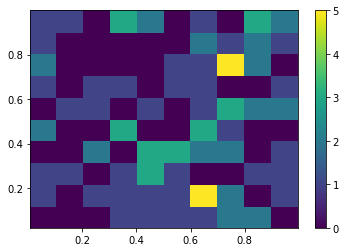

In [320]:
plot_epistemic_coverage(epistemic_space)

In [321]:
ec1,ec2,ec3,ec4=evolve_network_using_N_model(G1,G2,G3,G4,epistemic_space,time_steps,attempt_per_time_step)

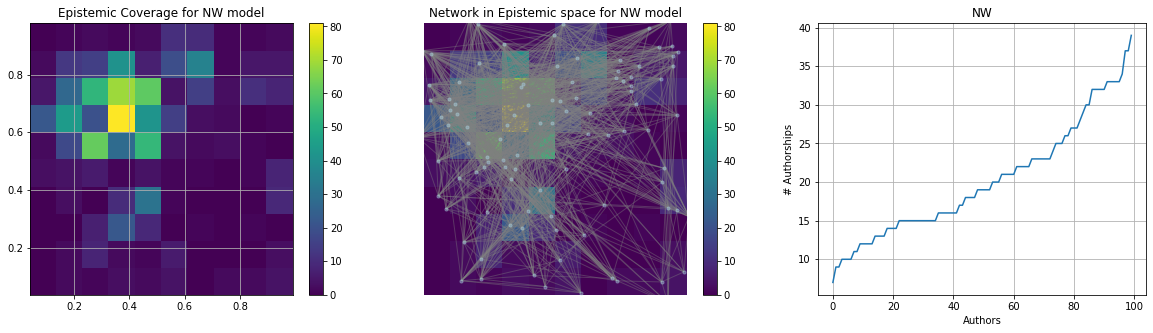

In [322]:
plot_figures_NW(G1,ec1,epistemic_space)

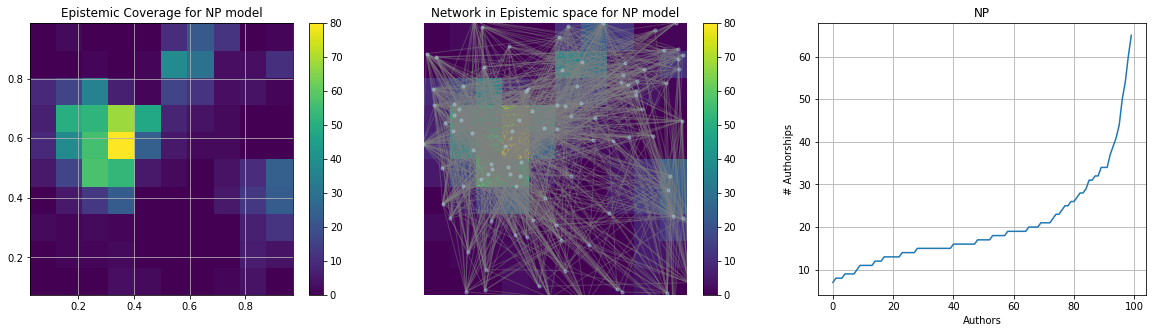

In [323]:
plot_figures_NP(G2,ec2,epistemic_space)

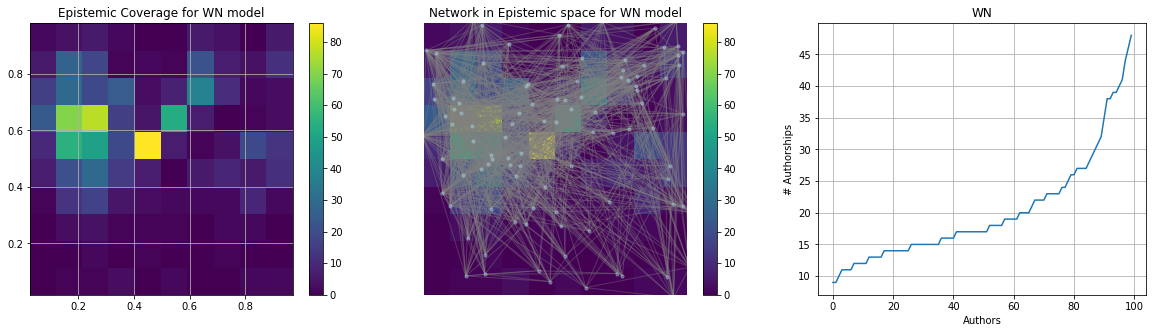

In [324]:
plot_figures_WN(G3,ec3,epistemic_space)

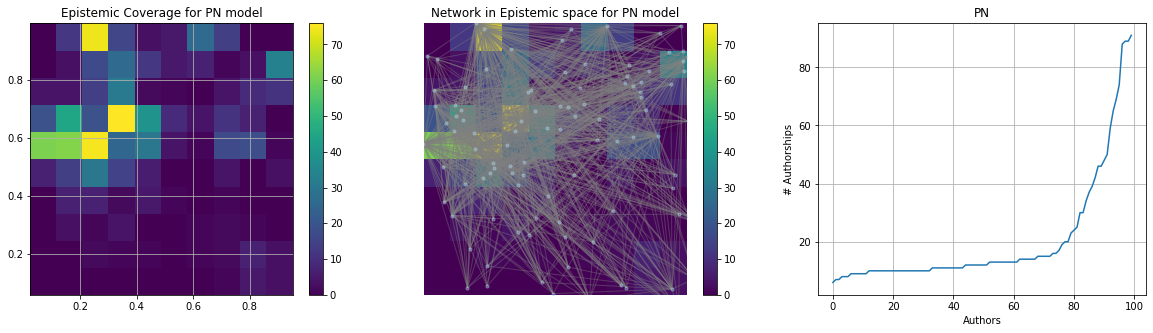

In [325]:
plot_figures_PN(G4,ec4,epistemic_space)